In [1]:
import pandas as pd
import tiktoken
import math
from transformers import MBartTokenizerFast

C:\Users\RistoHinno\anaconda3\lib\site-packages\transformers\utils\generic.py:485: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


## Data

In [2]:
df=pd.read_csv('data/interim/stenos_cleaned_faction2022.csv')
df.shape

(241366, 17)

## tokenizer

In [3]:
tokenizer=tiktoken.encoding_for_model("gpt-4")
tokenizer.encode('tere tulemast')

[55704, 259, 1130, 97613]

In [4]:
tokenizer_mbart = MBartTokenizerFast.from_pretrained("facebook/mbart-large-cc25")
tokenizer_mbart.src_lang = "et_EE"
tokenizer_mbart.tgt_lang = "et_EE"

## see how many toks there are in päevakorrapunktid

In [5]:
df.columns

Index(['heading', 'speaker', 'link_video', 'link_steno', 'index_pk',
       'index_snd', 'text', 'year', 'month', 'day', 'time',
       'seconds_from_start', 'video_link_wo_time', 'text_wo_punct', 'date',
       'koosseis', 'fation'],
      dtype='object')

In [6]:
df.index_snd.nunique()

241366

In [7]:
df.index_pk.nunique()

11171

In [8]:
df['ntoks']=df.text.apply(lambda x: len(x.split()))
df['ntoks_tiktoken']=df.text.apply(lambda x: len(tokenizer.encode(x)))

In [9]:
df['ntoks_mbart']=df.text.apply(lambda x: len(tokenizer_mbart(x)['input_ids']))

Token indices sequence length is longer than the specified maximum sequence length for this model (2961 > 1024). Running this sequence through the model will result in indexing errors


<Axes: >

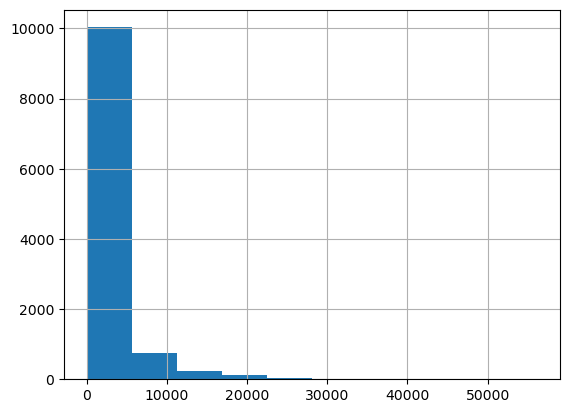

In [10]:
df.groupby('index_pk')['ntoks'].sum().hist()

<Axes: >

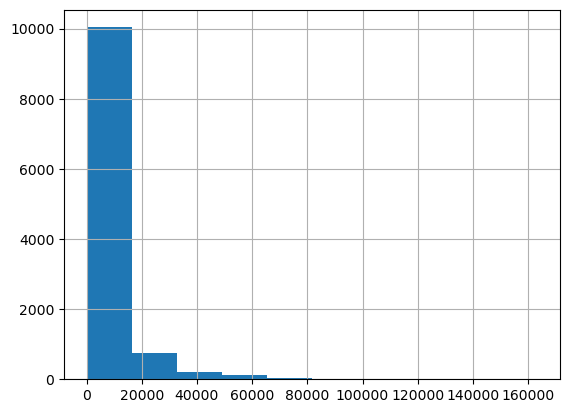

In [11]:
df.groupby('index_pk')['ntoks_tiktoken'].sum().hist()

In [12]:
df.groupby('index_pk')['ntoks_tiktoken'].sum().describe()

count     11171.000000
mean       6428.416883
std       10887.452170
min           3.000000
25%        1042.500000
50%        2693.000000
75%        6590.500000
max      163447.000000
Name: ntoks_tiktoken, dtype: float64

<Axes: >

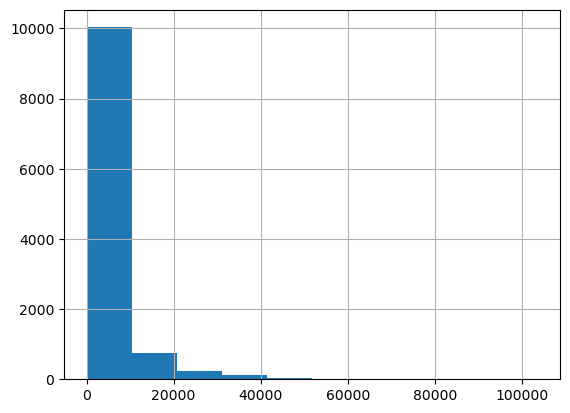

In [13]:
df.groupby('index_pk')['ntoks_mbart'].sum().hist()

In [14]:
df.groupby('index_pk')['ntoks_mbart'].sum().describe()

count     11171.000000
mean       4080.807627
std        6960.248098
min           5.000000
25%         633.000000
50%        1712.000000
75%        4171.000000
max      103598.000000
Name: ntoks_mbart, dtype: float64

## make text where speaker is appended to text

In [71]:
df['speaker_text']=' \n '+df.speaker+': '+df.text

In [72]:
df.speaker_text[1]

' \n Aseesimees Siim Kallas: Täna on meil päevakorras olulise tähtsusega riikliku küsimusena "Maksusüsteem – kuidas edasi?" arutelu. See on Eesti Keskerkaonna fraktsiooni algatatud olulise tähtsusega riikliku küsimuse arutelu. Tutvustan, kuidas see asi peaks välja nägema. Kõigepealt on meil ettekanded. Keskerakonna fraktsiooni esimehe Kersti Sarapuu ettekanne on kuni 15 minutit, küsimused ja vastused kuni 15 minutit. Seejärel on Rahandusministeeriumi maksu- ja tollipoliitika asekantseleri Dmitri Jegorovi ettekanne kuni 20 minutit, küsimused ja vastused kuni 20 minutit. Siis on Indrek Neivelti ettekanne kuni 20 minutit, küsimused ja vastused kuni 20 minutit. Riigikogu liige võib esitada ettekandjatele kokku kuni kaks küsimust.\xa0Ühesõnaga, ettekandjatele kokku on igaühel kaks küsimust. Pärast ettekandeid ja küsimustele vastamist avatakse läbirääkimised. Sõnavõttudega võivad esineda kõik Riigikogu liikmed, kes seda soovivad, ning komisjonide ja fraktsioonide esindajad. Eesti Keskerakonn

In [73]:
df[df.index_pk=='PKP-25041']['speaker_text'][1]

' \n Aseesimees Siim Kallas: Täna on meil päevakorras olulise tähtsusega riikliku küsimusena "Maksusüsteem – kuidas edasi?" arutelu. See on Eesti Keskerkaonna fraktsiooni algatatud olulise tähtsusega riikliku küsimuse arutelu. Tutvustan, kuidas see asi peaks välja nägema. Kõigepealt on meil ettekanded. Keskerakonna fraktsiooni esimehe Kersti Sarapuu ettekanne on kuni 15 minutit, küsimused ja vastused kuni 15 minutit. Seejärel on Rahandusministeeriumi maksu- ja tollipoliitika asekantseleri Dmitri Jegorovi ettekanne kuni 20 minutit, küsimused ja vastused kuni 20 minutit. Siis on Indrek Neivelti ettekanne kuni 20 minutit, küsimused ja vastused kuni 20 minutit. Riigikogu liige võib esitada ettekandjatele kokku kuni kaks küsimust.\xa0Ühesõnaga, ettekandjatele kokku on igaühel kaks küsimust. Pärast ettekandeid ja küsimustele vastamist avatakse läbirääkimised. Sõnavõttudega võivad esineda kõik Riigikogu liikmed, kes seda soovivad, ning komisjonide ja fraktsioonide esindajad. Eesti Keskerakonn

In [74]:
df.speaker_text

0          \n Aseesimees Siim Kallas: Auväärt kolleegid,...
1          \n Aseesimees Siim Kallas: Täna on meil päeva...
2          \n Kersti Sarapuu: Lugupeetud istungi juhataj...
3          \n Aseesimees Siim Kallas: Aitäh! Ettekandjat...
4          \n Aivar Sõerd: Aitäh, austatud juhataja! Aus...
                                ...                        
241361                            \n Jõuluvana: Selge. Jaa.
241362     \n Jaak Juske:  See lõppev aasta polnud kerge...
241363                 \n Jõuluvana:  Väga ilus, väga ilus!
241364     \n Toomas Jürgenstein:  Head kolleegid! Hea j...
241365     \n Jõuluvana:  Väga ilus, väga ilus. Tublid p...
Name: speaker_text, Length: 241366, dtype: object

In [75]:
df['ntoks_speaker_text_mbart']=df.speaker_text.apply(lambda x: len(tokenizer_mbart(str(x))['input_ids']))

In [76]:
df.groupby('index_pk')['ntoks_speaker_text_mbart'].sum().describe()

count     11171.000000
mean       4235.437920
std        7207.427296
min           3.000000
25%         667.000000
50%        1784.000000
75%        4333.000000
max      107229.000000
Name: ntoks_speaker_text_mbart, dtype: float64

## see how long segments are

<Axes: >

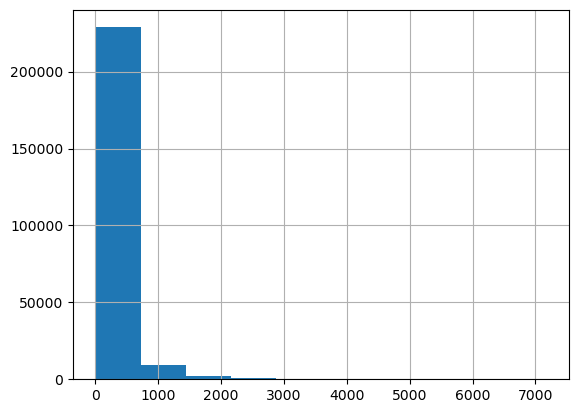

In [77]:
df.ntoks_speaker_text_mbart.hist()

In [78]:
df[df.ntoks_speaker_text_mbart>1000].shape

(6264, 22)

In [79]:
df.shape

(241366, 22)

In [80]:
df[df.ntoks_speaker_text_mbart>1000].shape[0]/df.shape[0]

0.02595228822617933

In [81]:
df.ntoks_speaker_text_mbart.describe()

count    241366.000000
mean        196.026271
std         337.821829
min           3.000000
25%          25.000000
50%          97.000000
75%         215.000000
max        7176.000000
Name: ntoks_speaker_text_mbart, dtype: float64

## create dataset where each index_pk texts are up to 2048 mbart tokens

In [82]:
df[(df.ntoks_speaker_text_mbart<1000)&(df.ntoks_speaker_text_mbart>950)].speaker_text[395]

' \n Peeter Kreitzberg: Austatud juhataja! Lugupeetud minister! Kolleegid! See on päris hea eelnõu selles mõttes, et see jätkab pensioniea tõstmise arutelu, mille minu meelest üsna efektselt lõpetas Lauri Vahtre, kes ütles, et lõpetage noorte tapmine, siis nad elavad hästi kaua ja ei ole mingit probleemi 65-aastaselt pensionileminekuga. See on nüüd see eelnõu, mis puudutab noori ja kus ilmselt tuleb hakata mõtlema selle peale, kuidas noori mitte tappa, et nad tõesti kaua elaksid. Selle eelnõu puhul ma ütleksin, et asi ei lähe mitte paremaks, vaid läheb ka noorte puhul oluliselt halvemaks. Haridusalastel eelnõudel peab olema alati mingi haridusalane eesmärk. Näiteks olgu eesmärgiks see, nii nagu põhikooli- ja gümnaasiumiseaduses on väga kenasti öeldud, et üle 24 õpilase ei tohi klassis olla. Siin võime me samuti apelleerida inimeste mõistusele, usule või millele iganes. Me võime kehtestada ka liikluses piirnormiks 200 kilomeetrit tunnis, olles kindlad, et inimesed on hästi targad ja mõi

In [83]:
def split_text_into_equal_parts(text, n_parts):
    """
    Splits text into approximately equal parts, trying to preserve complete sentences.
    
    Args:
        text (str): The input text to split.
        n_parts (int): The number of parts to split the text into.
    
    Returns:
        list of str: A list where each item is a part of the original text.
    """
    # Split the text by period to preserve sentences
    sentences = [sentence.strip() + '.' for sentence in text.split('.') if sentence.strip()]
    
    # If there are fewer sentences than parts, return the sentences as parts directly
    if len(sentences) <= n_parts:
        return sentences + [''] * (n_parts - len(sentences))
    
    # Calculate the ideal number of characters per part
    total_chars = sum(len(sentence) for sentence in sentences)
    part_char_count = total_chars / n_parts
    
    parts = []
    current_part = ""
    current_length = 0
    
    for sentence in sentences:
        # Check if adding this sentence to the current part would exceed the ideal part length
        if current_length + len(sentence) > part_char_count and current_part:
            # If so, start a new part
            parts.append(current_part)
            current_part = sentence
            current_length = len(sentence)
            # Adjust part size for remaining parts to handle any imbalance
            remaining_parts = n_parts - len(parts)
            if remaining_parts > 0:
                part_char_count = (total_chars - current_length) / remaining_parts
        else:
            # Otherwise, add the sentence to the current part
            current_part += ' ' + sentence if current_part else sentence
            current_length += len(sentence)
    
    # Add the last part if it contains any sentences
    if current_part:
        parts.append(current_part)
    
    # If there aren't enough parts due to rounding, add empty strings
    while len(parts) < n_parts:
        parts.append('')
    
    return parts

In [113]:
text_chunks=[]

max_mbart_tokens=2000
ntoks_chunk=0
text_chunk=''
index_pk_prev=df.index_pk[0]

for i, row in df.iterrows():
    
    if row['ntoks_speaker_text_mbart']>max_mbart_tokens:
        n_parts=math.ceil(row['ntoks_speaker_text_mbart']/(max_mbart_tokens-100))
        if n_parts>3:
            n_parts+=1
        parts=split_text_into_equal_parts(row['speaker_text'], n_parts)
        
        for j, part in enumerate(parts):
            if len(part)>10:
                if j==0:
                    text=part
                else:
                    text=' \n '+ row['speaker']+': '+part
                text_chunks.extend([{'text':text, 'index_pk':row['index_pk'], 'ntoks':row['ntoks_speaker_text_mbart']/n_parts}])
        ntoks_chunk=0
        text_chunk=''
        index_pk_prev=row['index_pk']
        
    elif (row['ntoks_speaker_text_mbart']+ntoks_chunk>max_mbart_tokens and ntoks_chunk>0) or index_pk_prev!=row['index_pk']:
        text_chunks.extend([{'text':text_chunk, 'index_pk':index_pk_prev, 'ntoks':ntoks_chunk}])
        ntoks_chunk=row['ntoks_speaker_text_mbart']
        text_chunk=row['speaker_text']
        index_pk_prev=row['index_pk']

    else:    
        text_chunk=f"{text_chunk} \n {row['speaker_text']}"
        ntoks_chunk+=row['ntoks_speaker_text_mbart']

In [139]:
df.speaker_text

0          \n Aseesimees Siim Kallas: Auväärt kolleegid,...
1          \n Aseesimees Siim Kallas: Täna on meil päeva...
2          \n Kersti Sarapuu: Lugupeetud istungi juhataj...
3          \n Aseesimees Siim Kallas: Aitäh! Ettekandjat...
4          \n Aivar Sõerd: Aitäh, austatud juhataja! Aus...
                                ...                        
241361                            \n Jõuluvana: Selge. Jaa.
241362     \n Jaak Juske:  See lõppev aasta polnud kerge...
241363                 \n Jõuluvana:  Väga ilus, väga ilus!
241364     \n Toomas Jürgenstein:  Head kolleegid! Hea j...
241365     \n Jõuluvana:  Väga ilus, väga ilus. Tublid p...
Name: speaker_text, Length: 241366, dtype: object

In [114]:
len(text_chunks)

32886

In [115]:
df_chunks=pd.DataFrame(text_chunks)
df_chunks.shape

(32886, 3)

In [116]:
df_chunks.head()

,text,index_pk,ntoks
0,\n \n Aseesimees Siim Kallas: Auväärt kollee...,PKP-25040,147.0
1,Kersti Sarapuu: Lugupeetud istungi juhataja! H...,PKP-25041,1483.0
2,\n Kersti Sarapuu: Eurostati andmetel oli Gin...,PKP-25041,1483.0
3,\n \n Aseesimees Siim Kallas: Aitäh! Ettekan...,PKP-25041,1918.0
4,Rahandusministeeriumi asekantsler Dmitri Jegor...,PKP-25041,1655.5


## retokenize

In [117]:
df_chunks['ntoks_space']=df_chunks.text.apply(lambda x: len(str(x).split()))

In [118]:
df_chunks['ntoks_mbart']=df_chunks.text.apply(lambda x: len(tokenizer_mbart(str(x))['input_ids']))

In [119]:
df_chunks['ntoks_gpt35']=df_chunks.text.apply(lambda x: len(tokenizer.encode(str(x))))

In [120]:
df_chunks['ntoks_mbart'].describe()

count    32886.000000
mean      1402.774980
std        557.186736
min          2.000000
25%       1073.000000
50%       1590.000000
75%       1866.000000
max       2808.000000
Name: ntoks_mbart, dtype: float64

In [121]:
df_chunks['ntoks_gpt35'].describe()

count    32886.000000
mean      2218.304111
std        876.849337
min          0.000000
25%       1714.000000
50%       2508.000000
75%       2928.000000
max       4579.000000
Name: ntoks_gpt35, dtype: float64

In [122]:
df_chunks['ntoks_space'].describe()

count    32886.000000
mean       759.029648
std        310.448113
min          0.000000
25%        568.000000
50%        863.000000
75%       1010.000000
max       1605.000000
Name: ntoks_space, dtype: float64

In [123]:
df_chunks[df_chunks.ntoks_space<10]

,text,index_pk,ntoks,ntoks_space,ntoks_mbart,ntoks_gpt35
692,NaN,PKP-22649,3.0,1,3,1
696,"\n \n Esimees Eiki Nestor: Tänan teid, proua...",PKP-22653,18.0,7,18,20
1356,"\n Aseesimees Siim Kallas: Tere hommikust, au...",PKP-25071,23.0,8,23,32
2158,"\n Esimees Eiki Nestor: Austatud Riigikogu, t...",PKP-22899,17.0,7,17,24
2306,\n Esimees Eiki Nestor: Austatud Riigikogu! T...,PKP-22577,17.0,7,17,25
3264,"\n Esimees Eiki Nestor: Austatud Riigikogu, t...",PKP-20541,17.0,7,17,25
4203,\n Esimees Henn Põlluaas: Aitäh! Tarmo Kruusi...,PKP-42423,22.0,7,22,29
4436,\n Aseesimees Hanno Pevkur: Kohale registreer...,PKP-271726,22.0,8,22,28
4697,"\n Esimees Eiki Nestor: Austatud Riigikogu, t...",PKP-21424,17.0,7,17,24
6356,\n Aseesimees Hanno Pevkur: Lõpetan selle kü...,PKP-233809,22.0,7,22,27


In [124]:
df_chunks[df_chunks.ntoks>1024].index_pk.nunique()

7421

In [125]:
df_chunks.index_pk.nunique()

11168

In [126]:
df_chunks[df_chunks.ntoks>1024].index_pk.nunique()/df_chunks.index_pk.nunique()

0.6644878223495702

## Review what sequences could be kept for summarization

<Axes: >

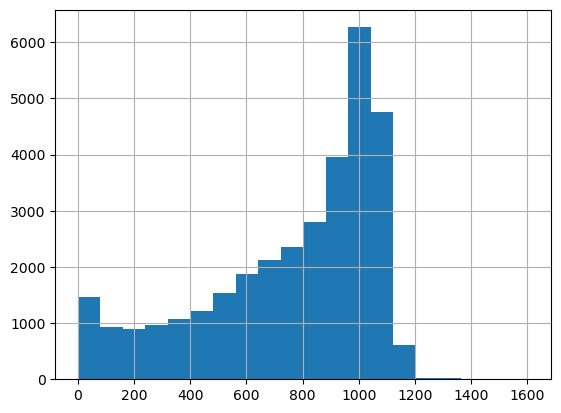

In [127]:
df_chunks['ntoks_space'].hist(bins=20)

In [128]:
df_chunks[df_chunks.ntoks_space==100].text

3064      \n Aseesimees Keit Pentus: Suur tänu, austatu...
11074     \n Aseesimees Jüri Ratas: Esimene päevakorrap...
13161     \n Aseesimees Helir-Valdor Seeder: Head kolle...
13606     \n Esimees Ene Ergma: Järgmine päevakorrapunk...
18877     \n Esimees Ene Ergma: Järgmine päevakorrapunk...
19395     \n Aseesimees Hanno Pevkur: Teine päevakorrap...
22026     \n Esimees Henn Põlluaas: Tänane ainus päevak...
22339     \n Esimees Eiki Nestor: Vabariigi Valitsuse a...
24068     \n Esimees Ene Ergma: Algab Vabariigi Valitsu...
25855     \n Aseesimees Helir-Valdor Seeder: Tere hommi...
26618     \n Aseesimees Enn Eesmaa: Tere hommikust, aus...
26907     \n Aseesimees Jüri Ratas: Tänan! Rohkem kõnes...
30903     \n Aseesimees Helir-Valdor Seeder:  Ja olemeg...
Name: text, dtype: object

In [129]:
df_chunks.shape

(32886, 6)

In [130]:
df_chunks[df_chunks.ntoks_space>100].shape

(31030, 6)

<Axes: >

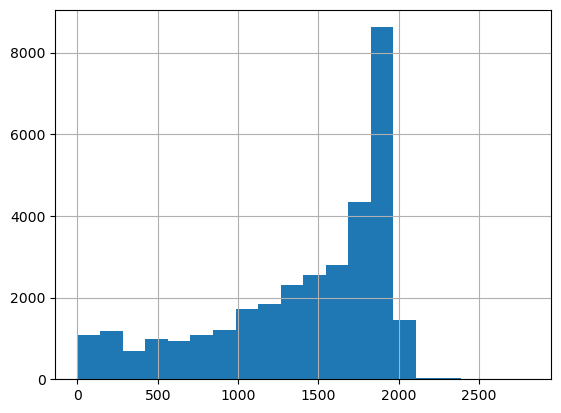

In [131]:
df_chunks['ntoks_mbart'].hist(bins=20)

In [132]:
df_chunks[df_chunks['ntoks_mbart']>2000].shape

(138, 6)

## save 

In [133]:
df_chunks.to_excel('data/interim/summarization/for_summarization_mbart_2048_chunks.xlsx', index=False)

In [134]:
df_chunks.text[0]

' \n  \n Aseesimees Siim Kallas: Auväärt kolleegid, auväärt Riigikogu, tere hommikust! Kui te nüüd korraks jälle keskendute meie suurepärase istungi rakendamisele ja räägite omavahelisi jutte edasi pärast, siis on mul suur rõõm avada Riigikogu täiskogu II istungjärgu 9. töönädala teisipäevane istung. Kõigepealt on eelnõude ja arupärimiste üleandmine, kui selleks on soovi. Eelnõude ja arupärimiste üleandmise soovi ma ei näe. Siis teeme palun kohaloleku kontrolli.\xa0 Kohaloleku kontroll Kohal on 75 Riigikogu liiget, puudub 26. Sellest piisab täielikult, et asuda meie päevakorra arutelu juurde.'

In [135]:
df_chunks.text[1]

'Kersti Sarapuu: Lugupeetud istungi juhataja! Head kolleegid ja külalised! Tänane arutelu siin Riigikogu saalis toimub suuresti tänu peaminister Jüri Ratase üleskutsele arutada laiemalt meie maksusüsteemi ja maksukoormust. Keskerakonna fraktsioon toetab seda mõtet ning just seetõttu oleme toonud maksude teema täna oluliselt tähtsa riikliku küsimusena Riigikogusse. Praegune ajahetk sobib mitmel põhjusel maksuaruteluks. Esiteks on järgmise aasta riigieelarve eelnõu jõudnud sellisesse staadiumisse, et ka kõige skeptilisem opositsiooniliige saab aru, et selle arutelu eesmärk ei ole luua fooni viimase hetke maksutõusudeks, vaid valitsus peab kinni oma lubadusest, et meil on maksurahu. Kuigi tegemist on näiliselt lihtsa lubadusega, ei olegi see varem Eestis olnud nii elementaarne. Teiseks on järgmised valimised piisavalt kaugel ega takista arutelu. Me nägime väga hästi, mis juhtus Kaja Kallasega, kui ta enne valimisi käis välja sotsiaalmaksu kaotamise idee. Idee oli, kuid Reformierakonna val

In [136]:
df_chunks.text[2]

' \n Kersti Sarapuu: Eurostati andmetel oli Gini indeks Eestis eelmisel aastal 31,7%. Viimastel aastatel on indeksi väärtus järjekindlalt langenud ehk ebavõrdsus on vähenenud. Näiteks, 2015. aastal oli Eesti näitaja 34,8. Ühest küljest me võime olla uhked, kuid paraku on Põhjamaad meist veel sissetulekute võrdsema jaotuse poolest kaugel ees. Soomes oli vastav näitaja eelmisel aastal 25,9 ja Rootsil 27. Seejuures kõige väiksem ebavõrdsus Euroopa Liidus on Slovakkias, Sloveenias ja Tšehhis, kus Gini indeksi koefitsient on 23% ja 24% vahel. Kuigi eestlastel meeldib ennast alati võrrelda lätlastega, siis on Eesti ka Sloveeniaga küllaltki sarnane. Mõlema riigi näol on tegemist 1990-ndate alguses taasiseseisvunud riigiga. Samuti astusid Euroopa Liitu mõlemad riigid samal ajal –\xa02004. aastal. Tõsi, Sloveenia eksportis juba Jugoslaavia aegadel kolm korda rohkem välismaale ning ettevõtjad olid 1960. aastatest isemajandavad, mis tagas Sloveeniale parema stardipositsiooni ja ka väiksema kukkum

In [137]:
df_chunks.text[3]

' \n  \n Aseesimees Siim Kallas: Aitäh! Ettekandjatele ütlen niipalju, et selles mudelis, mis on kokku lepitud, ei ole ettekande pikendamist ette nähtud. Kui sõnavõttude puhul anname kolm minutit juurde, siis ettekannetega on nii, et jääb see 20 või 15 minutit, nagu on kokku lepitud. Aga ettekandjale on mõistagi küsimusi ja ka seda tuletan meelde, et küsimuste peale kokku on meil sellele ettekandjale 15 minutit ja igaühel on võimalik esitada kokku kaks küsimust kõikidele ettekandjatele. Nii et tehke omad plaanid selle järgi. Aivar Sõerd, palun! \n  \n Aivar Sõerd: Aitäh, austatud juhataja! Austatud ettekandja! Eile olime rahanduskomisjonis, te istusite ka seal, ja meil oli kohtumine Eesti Pangaga. On teada, et pensionisüsteemi muudatused viivad pensionisüsteemist raha minema. Küsimus pole selles, kas, vaid selles, kui suures ulatuses tuleb tõsta makse selleks, et pensionikulusid tulevikus katta, kui asendusmäär langeb allapoole 40% praegust taset. Aga ma küsin selle kohta, et sellel ma